# MA124 Maths by Computer: Assignment 5

## Linear Algebra

This assignment consists of completing the computational tasks specified in this notebook. Your plots should be clearly labelled. There is no additional write up. You do not need an introduction or conclusion or discussion of your results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### Part A: Eigenvalues (10 Marks)

1. Set `N=100`. Create a matrix `M1` consisting of all `-1` on the first super-diagonal and all `+1` on the first sub-diagonal.  Then put a `+1` in the top right corner and a `-1` in the bottom left corner. 

In [2]:
N = 100
M1 = np.diag(np.ones(99),-1) -np.diag(np.ones(99),1)
M1 [0,99] = 1
M1 [99,0] = -1

---

2. Form the matrix `M2` given by $M_2 = -\frac{1}{4} M_1^4$, where $M_1^4$ is matrix product of $M_1$ with itself 4 times. (You can compute this using any of the methods for taking matrix products, but you cannot use `for loops`.) 

In [3]:
M2 = np.linalg.matrix_power(M1, 4)/ -4

---

3. Compute the eigenvalues of `M1` and `M2` and plot these in the complex plane. Produce a single plot with the eigenvalues for both matrices. Use a legend to indicate which eigenvalues correspond to which matrix. For this plot and all subsequent eigenvalue plot, use `plt.axis("square")` to produce a square plot.

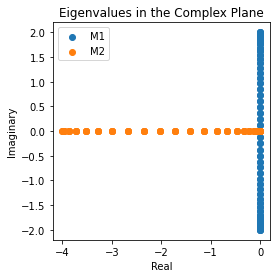

In [4]:
egv1 = np.linalg.eigvals(M1)
egv2 = np.linalg.eigvals(M2)

plt.scatter(egv1.real, egv1.imag, label = "M1")
plt.scatter(egv2.real, egv2.imag, label = "M2")
plt.title("Eigenvalues in the Complex Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axis("square")
plt.legend()
plt.show()

The collection of eigenvalues is known as an eigenvalue spectrum. What you will learn later is that the imaginary part of an eigenvalue corresponds to an oscillation frequency while the real part corresponds to exponential decay (real part negative) or growth (real part positive). Hence, we see that $M_1$ corresponds to oscillatory behaviour while $M_2$ corresponds to exponential decay.

---

4. Form a matrix `M3` given by $M_3 = M_1 + M_2$. Compute and plot its eigenvalues in the complex plane. 

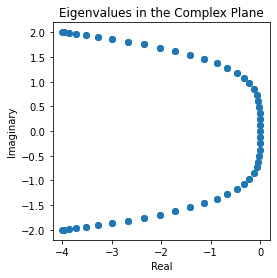

In [5]:
M3 = M1 + M2
egv3 = np.linalg.eigvals(M3)
plt.scatter(egv3.real, egv3.imag)
plt.title("Eigenvalues in the Complex Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axis("square")
plt.show()

Here we see that the eigenvalue spectrum of $M_3$ shows a mixture of oscillation and decay. 

---

5. Form a new matrix $A_{plus} = I + \frac{1}{2} M_3$, where `I` is the $N \times N$ identity matrix. Form another new matrix $A_{minus} = (I - \frac{1}{2} M_3)^{-1}$, where $~^{-1}$ means matrix inverse. Matrices like these arise in the numerical solution of partial differential equations.

In [6]:
A_plus = np.eye(N) + (M3 * 0.5)
A_minus = np.linalg.inv(np.eye(N) - (M3 * 0.5))

---

6. Compute the eigenvalues of $A_{plus}$ and $A_{minus}$ and plot these in the complex plane. Produce a single plot with the eigenvalues for both matrices. Use a legend to indicate which eigenvalues correspond to which matrix. 

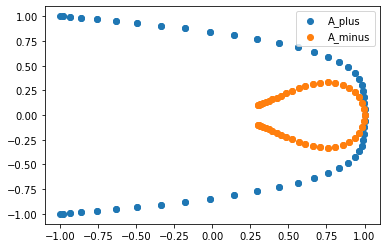

In [7]:
egvP = np.linalg.eigvals(A_plus)
egvM = np.linalg.eigvals(A_minus)
plt.scatter(egvP.real, egvP.imag, label="A_plus")
plt.scatter(egvM.real, egvM.imag, label="A_minus")
plt.legend()
plt.show()

---

7. Compute the eigenvalues of $A_{plus}^4$ and $A_{minus}^4$ and plot these in the complex plane. Produce a single plot with the eigenvalues for both matrices. You want to use `np.linalg.matrix_power` for this.

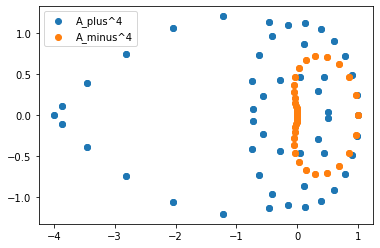

In [8]:
A_plus4 = np.linalg.matrix_power(A_plus, 4)
A_minus4 = np.linalg.matrix_power(A_minus, 4)
egvP4 = np.linalg.eigvals(A_plus4)
egvM4 = np.linalg.eigvals(A_minus4)
plt.scatter(egvP4.real, egvP4.imag, label="A_plus^4")
plt.scatter(egvM4.real, egvM4.imag, label="A_minus^4")
plt.legend()
plt.show()

---

### Part B: Moore-Penrose Pseudo-Inverse (10 Marks) 

Let $T: \mathbb R[x]_{\le 5} \to \mathbb R[x]_{\le 5}$ be given by $T(f) = df/dx$ in the basis of monomials: $1, x, x^2, x^3, x^4, x^5$.

1. Write Python code to generate the $6 \times 6$ matrix $D$ for this linear transformation. Print the matrix $D$. 


In [9]:
K=6
ar = np.arange(1,K)
diag = np.diag(ar,1)
print(diag)

[[0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 5]
 [0 0 0 0 0 0]]


---

Let the vector $v$ be the coordinates of $f$ in the monomial basis, e.g. $f=1+x$ gives $v = (1,1,0,0,0,0)$. You can differentiate this polynomial by multiplying by the matrix $D$. 

2. Let $f = 2 - 3x - 4x^2 + 5 x^3 + 6x^4 - 7x^5$. Form the coordinate vector $v$. Compute $w = Dv$ and print the resulting vector $w$. (You should be happy that the resulting vector is the coordinate vector of $df/dx$.)

In [10]:
x = np.array([2,-3,-4,5,6,-7])
w = diag @ x
print(w)

[ -3  -8  15  24 -35   0]


---

3. Compute and print the determinant of $D$. 

In [11]:
detD = np.linalg.det(diag)
print(detD)

0.0


$D$ is singular and hence $D$ does not have an inverse. 

However, $D$ has a pseudo-inverse. 

4. Compute $D_{pinv}$, the pseudo-inverse of $D$. Compute and print $v_2 = D_{pinv} w$. (You should be satisfied that multiplying by $D_{pinv}$ does in fact correspond to integration with a particular choice of the constant of integration.)

In [12]:
DpinV = np.linalg.pinv(diag)
V2 = DpinV @ w
print(V2)

[ 0. -3. -4.  5.  6. -7.]


5. Print $D_{pinv}$

In [13]:
print(DpinV)

[[0.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.        ]
 [0.         0.         0.         0.         0.2        0.        ]]


---

### Part C: Image Compression and Edge Detection (5 Marks)

Most of this part of the assignment has already been completed for you. A greyscale image of $M \times N$ pixels is effectively a $M \times N$ matrix with each matrix element corresponding to the greyscale value at the corresponding pixel. Here we exploit this to have some fun.

The cell below imports some modules from skimage.

In [14]:
from skimage import data
from skimage import img_as_float
from skimage.color import rgb2gray

---

We load an image (here an espresso cup), convert the image to floats and convert the colour to greyscale. The result is a $400 \times 600$ matrix.

In [15]:
matrix = rgb2gray(img_as_float(data.coffee()))
print(matrix.shape)

(400, 600)


---

Using matplotlib it is possible to plot the image. 

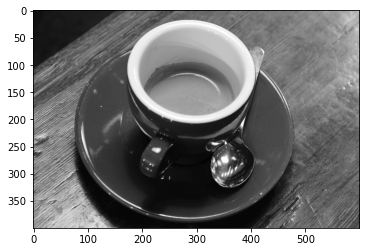

In [16]:
plt.imshow(matrix,cmap='gray')
plt.show()

---

The following function demonstrates how the singular value decomposition (SVD) could be used to compress an image. The function has as input a matrix (corresponding to an image). The function computes the SVD of the matrix. From the SVD the function generates a new matrix (image) using only half of the singular values. 

(This function does not actually save the new image in a format that saves disk space, but it could. The function is meant to demonstrate how it is possible to extract the information content from the image using the SVD and reconstruct a nearly equivalent image using much less information .)

In [17]:
def compress_svd(matrix):
    U, s, VT = np.linalg.svd(matrix, full_matrices=False)
    orig_size = np.size(matrix)
    N = int(0.5 * len(s))
    U = U[:,:N]
    s = s[:N]
    VT = VT[:N,:]
    new_size = np.size(U) + np.size(s) + np.size(VT)
    print("compression ratio =", int(100*(new_size/orig_size)), "%")
    return U @ np.diag(s) @ VT

---

Here we call the demonstration function and then plot both the original image and the new image after the SVD.

In [18]:
matrix_compress = compress_svd(matrix)

compression ratio = 83 %


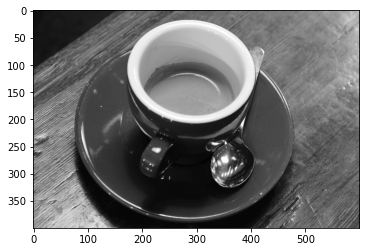

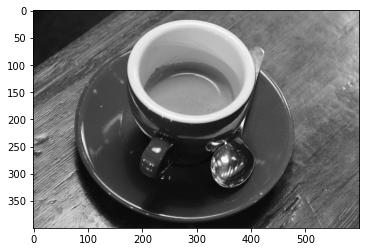

In [19]:
plt.imshow(matrix,cmap='gray')
plt.show()
plt.imshow(matrix_compress,cmap='gray')
plt.show()

1. Edit the above function to use only 25% of the singular values. Then edit the above function to use only 10% of the singular values. (For the assignment submission, use 10%. You are not mistaken. What you are being asked to do here is extremely simple.)

---

At the beginning of this assignment you created a $100 \times 100$ matrix $M_1$. 

2. Repeat that code in the cell below but with $N=400$. 

In [20]:
N = 400
M1 = np.diag(np.ones(399),-1) -np.diag(np.ones(399),1)
M1 [0,399] = 1
M1 [399,0] = -1

3. Generate a new image matrix `edge = M1 @ matrix` and plot it.

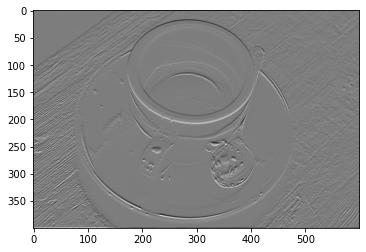

In [21]:
edge = M1 @ matrix
plt.imshow(edge, cmap="gray")
plt.show()

This shows how linear algebra can be used for edge detection in an image.